In [1]:
import pandas as pd

df = pd.read_csv("olympics.csv")

print(df.head(10))

   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   
5   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   
6   5  Christine Jacoba Aaftink   F  25.0   185.0    82.0     Netherlands   
7   5  Christine Jacoba Aaftink   F  25.0   185.0    82.0     Netherlands   
8   5  Christine Jacoba Aaftink   F  27.0   185.0    82.0     Netherlands   
9   5  Christine Jacoba Aaftink   F  27.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season         City          Sport  \
0  CHN  1992 Summer  1992  Summer    Barcelona     Basketball   
1  CHN  2012 Summer  2

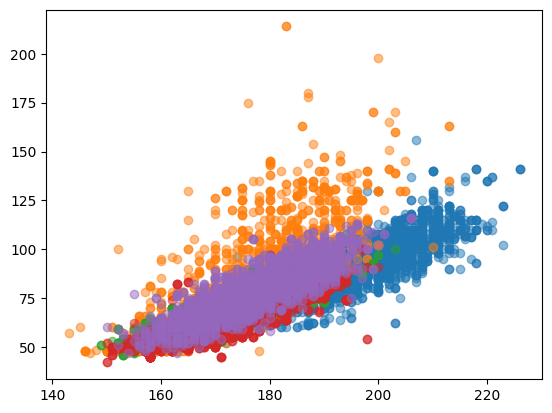

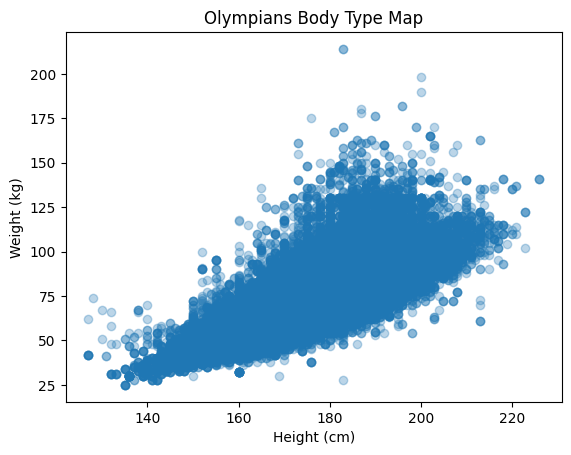

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# データ読み込み
df = pd.read_csv("olympics.csv")

# 身長・体重が欠損していない選手のみ抽出
body = df.dropna(subset=["Height", "Weight"])

for sport in body["Sport"].unique()[:5]:  # 例：最初の5競技
    s = body[body["Sport"] == sport]
    plt.scatter(s["Height"], s["Weight"], label=sport, alpha=0.5)

# 散布図
plt.figure()
plt.scatter(body["Height"], body["Weight"], alpha=0.3)

plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Olympians Body Type Map")

plt.show()



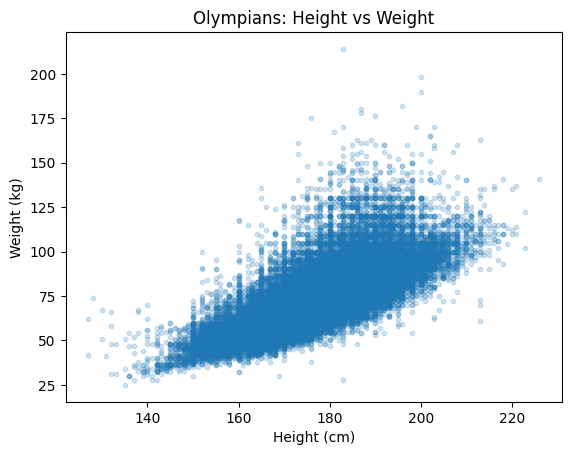

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("olympics.csv")

body = (
    df.dropna(subset=["Height", "Weight"])
      .drop_duplicates(subset=["Name", "Height", "Weight"])
)

plt.scatter(body["Height"], body["Weight"], alpha=0.2, s=10)
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Olympians: Height vs Weight")
plt.show()



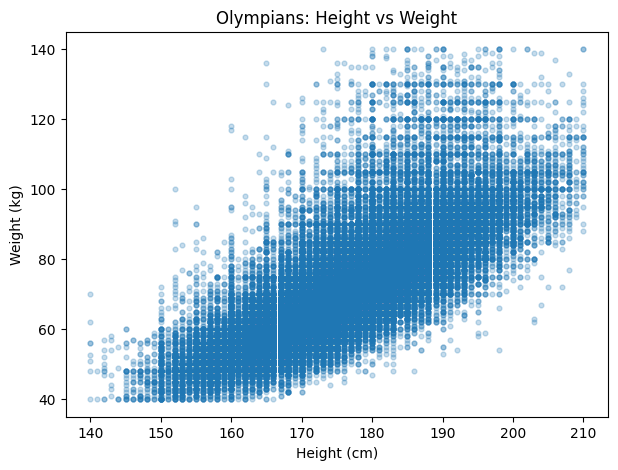

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("olympics.csv")

body = (
    df.dropna(subset=["Height", "Weight"])
      .drop_duplicates(subset=["Name", "Height", "Weight"])
)

# 外れ値カット（見た目重視）
body = body[
    (body["Height"].between(140, 210)) &
    (body["Weight"].between(40, 140))
]

plt.figure(figsize=(7, 5))
plt.scatter(body["Height"], body["Weight"], alpha=0.25, s=12)

plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Olympians: Height vs Weight")

plt.show()


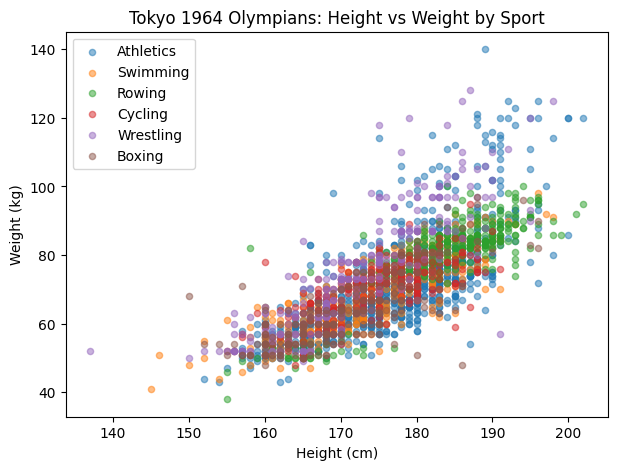

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# データ読み込み
df = pd.read_csv("olympics.csv")

# 東京オリンピック（1964年）に限定
tokyo64 = df[df["Year"] == 1964]

# 身長・体重がある選手のみ
body = (
    tokyo64
    .dropna(subset=["Height", "Weight", "Sport"])
    .drop_duplicates(subset=["Name", "Height", "Weight"])
)

# 出場人数が多い競技だけに絞る（見やすさ重視）
top_sports = body["Sport"].value_counts().head(6).index
body = body[body["Sport"].isin(top_sports)]

# 競技別に色分けして描画
plt.figure(figsize=(7, 5))

for sport in top_sports:
    s = body[body["Sport"] == sport]
    plt.scatter(
        s["Height"],
        s["Weight"],
        alpha=0.5,
        s=20,
        label=sport
    )

plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Tokyo 1964 Olympians: Height vs Weight by Sport")
plt.legend()
plt.show()


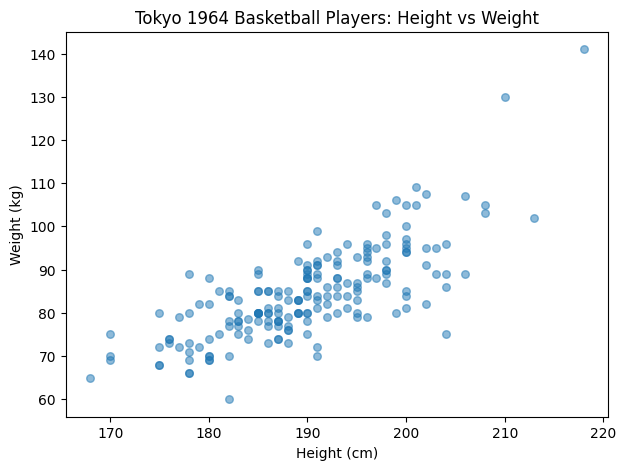

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# データ読み込み
df = pd.read_csv("olympics.csv")

# 東京オリンピック（1964年）× バスケットボールに限定
basket64 = df[
    (df["Year"] == 1964) &
    (df["Sport"] == "Basketball")
]

# 身長・体重がある選手のみ、重複除去
body = (
    basket64
    .dropna(subset=["Height", "Weight"])
    .drop_duplicates(subset=["Name", "Height", "Weight"])
)

# 散布図
plt.figure(figsize=(7, 5))
plt.scatter(body["Height"], body["Weight"], alpha=0.5, s=30)

plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Tokyo 1964 Basketball Players: Height vs Weight")

plt.show()



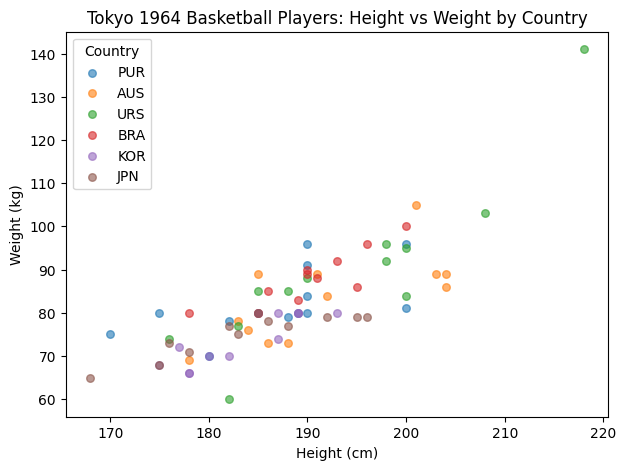

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# データ読み込み
df = pd.read_csv("olympics.csv")

# 東京1964 × バスケットボール
basket64 = df[
    (df["Year"] == 1964) &
    (df["Sport"] == "Basketball")
]

# 身長・体重がある選手のみ、重複除去
body = (
    basket64
    .dropna(subset=["Height", "Weight", "NOC"])
    .drop_duplicates(subset=["Name", "Height", "Weight"])
)

# 出場人数が多い国だけに絞る（見やすさ重視）
top_countries = body["NOC"].value_counts().head(6).index
body = body[body["NOC"].isin(top_countries)]

# 国別に色分け
plt.figure(figsize=(7, 5))

for noc in top_countries:
    c = body[body["NOC"] == noc]
    plt.scatter(
        c["Height"],
        c["Weight"],
        alpha=0.6,
        s=30,
        label=noc
    )

plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Tokyo 1964 Basketball Players: Height vs Weight by Country")
plt.legend(title="Country")
plt.show()



目的としては1964年の東京オリンピックに出場している主なチームのバスケ選手の身長と体重の散布図を作った。
わかったことは最低身長のメモリが170だということで他の競技と比べて身長が高い人が多いことが分かった。
面白いことがわかって国ごとにいろんな体格があり国によってもバラバラでとても面白かった。